In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('tradelog.csv', index_col = 0)

In [22]:
df['open_time_fmt'] = pd.to_datetime(df['open_time']).dt.time

(array([30., 20., 32., 26., 21., 27., 18.,  8.,  3., 13.,  8., 17., 17.,
        16., 23., 19.,  9., 11.,  5.,  6.,  2.,  7.,  5., 12.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

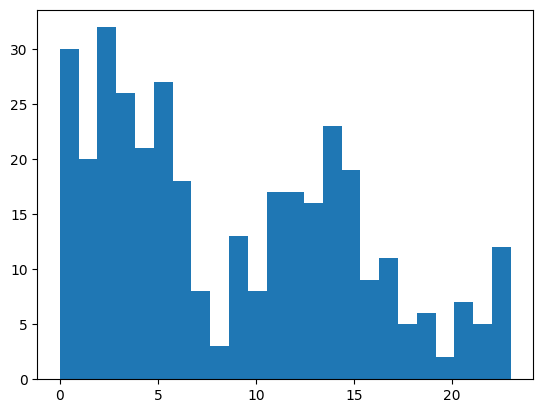

In [27]:
plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = 24)

In [29]:
hourly_summary = pd.DataFrame(index = [i for i in range(24)],columns = ['win_rate', 'PnL', 'no_trades'])



In [41]:
for h in hourly_summary.index:
    print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]
    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    PnL = dg['PnL'].sum()

    hourly_summary.loc[h,'win_rate'] = wins/no_trades
    hourly_summary.loc[h,'PnL']     = PnL
    hourly_summary.loc[h,'no_trades'] = no_trades


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [42]:
hourly_summary


,win_rate,PnL,no_trades
0,0.533333,0.624080,30
1,0.550000,0.846535,20
2,0.468750,-3.969285,32
3,0.461538,-2.860597,26
4,0.476190,-1.729008,21
5,0.518519,-0.250723,27
6,0.444444,-2.665743,18
7,0.500000,-0.257255,8
8,0.666667,0.866756,3
9,0.692308,4.250368,13
